# Лабораторная работа 9, кластеризация. Фида А.Д. 6135

В качестве данных для этой работы был выбран датасет для классификации мобильных устройств по ценовому сегменту (файл train из предоставляемого набора): https://www.kaggle.com/iabhishekofficial/mobile-price-classification

Признаками является количество ядер, характеристики экрана, батареи и т.д.

20 признаков, целевой столбец. Всего в используемом файле 2000 строк.

Целевой вектор содержит четыре значения: 0 - низкая стоимость, 1 - средняя, 2 - высокая, 3 - очень высокая.

In [1]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans
from sklearn.metrics import homogeneity_score, silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

### 0. Датасет

In [3]:
df = pd.read_csv('data/mobile_price_train.csv')
df.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

In [4]:
df.describe().T

count        mean          std    min      25%     50%  \
battery_power  2000.0  1238.51850   439.418206  501.0   851.75  1226.0   
blue           2000.0     0.49500     0.500100    0.0     0.00     0.0   
clock_speed    2000.0     1.52225     0.816004    0.5     0.70     1.5   
dual_sim       2000.0     0.50950     0.500035    0.0     0.00     1.0   
fc             2000.0     4.30950     4.341444    0.0     1.00     3.0   
four_g         2000.0     0.52150     0.499662    0.0     0.00     1.0   
int_memory     2000.0    32.04650    18.145715    2.0    16.00    32.0   
m_dep          2000.0     0.50175     0.288416    0.1     0.20     0.5   
mobile_wt      2000.0   140.24900    35.399655   80.0   109.00   141.0   
n_cores        2000.0     4.52050     2.287837    1.0     3.00     4.0   
pc             2000.0     9.91650     6.064315    0.0     5.00    10.0   
px_height      2000.0   645.10800   443.780811    0.0   282.75   564.0   
px_width       2000.0  1251.51550   432.199447  500.0   874.75  1247.0   
ram            2000.0  2124.21300  1084.732044  256.0  1207.50  2146.5   
sc_h           2000.0    12.30650     4.213245    5.0     9.00    12.0   
sc_w           2000.0     5.76700     4.356398    0.0     2.00     5.0   
talk_time      2000.0    11.01100     5.463955    2.0     6.00    11.0   
three_g        2000.0     0.76150     0.426273    0.0     1.00     1.0   
touch_screen   2000.0     0.50300     0.500116    0.0     0.00     1.0   
wifi           2000.0     0.50700     0.500076    0.0     0.00     1.0   
price_range    2000.0     1.50000     1.118314    0.0     0.75     1.5   

                   75%     max  
battery_power  1615.25  1998.0  
blue              1.00     1.0  
clock_speed       2.20     3.0  
dual_sim          1.00     1.0  
fc                7.00    19.0  
four_g            1.00     1.0  
int_memory       48.00    64.0  
m_dep             0.80     1.0  
mobile_wt       170.00   200.0  
n_cores           7.00     8.0  
pc               15.00    20.0  
px_height       947.25  1960.0  
px_width       1633.00  1998.0  
ram            3064.50  3998.0  
sc_h             16.00    19.0  
sc_w              9.00    18.0  
talk_time        16.00    20.0  
three_g           1.00     1.0  
touch_screen      1.00     1.0  
wifi              1.00     1.0  
price_range       2.25     3.0

In [5]:
y = df['price_range']
X = df.drop(columns=['price_range'])

### 1. Производим иерархическую агломеративную кластеризацию

In [6]:
hier = linkage(X, method='complete')

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [75.0, 75.0, 85.0, 85.0],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [80.0, 80.0, 102.5, 102.5],
  [52.5, 52.5, 91.25, 91.25],
  [22.5, 22.5, 71.875, 71.875],
  [145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [125.0, 125.0, 142.5, 142.5],
  [165.0, 165.0, 175.0, 175.0],
  [185.0, 185.0, 195.0, 195.0],
  [170.0, 170.0, 190.0, 190.0],
  [215.0, 215.0, 225.0, 225.0],
  [205.0, 205.0, 220.0, 220.0],
  [180.0, 180.0, 212.5, 212.5],
  [133.75, 133.75, 196.25, 196.25],
  [47.1875, 47.1875, 165.0, 165.0],
  [5.0, 5.0, 106.09375, 106.09375],
  [245.0, 245.0, 255.0, 255.0],
  [235.0, 235.0, 250.0, 250.0],
  [275.0, 275.0, 285.0, 285.0],
  [265.0, 265.0, 280.0, 280.0],
  [242.5, 242.5, 272.5, 272.5],
  [315.0, 315.0, 325.0, 325.0],
  [305.0, 305.0, 320.0, 320.0],
  [295.0, 295.0, 312.5, 312.5],
  [345.0, 345.0, 355.0, 355.0],
  [335.0, 33

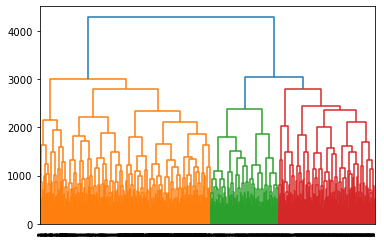

In [7]:
dendrogram(hier,
           labels=y.values,
           leaf_rotation=90,
           leaf_font_size=6,
           )

### 2. На том же датасете производим кластеризацию, используя любой другой метод кластеризации (пока с произвольными гиперпараметрами)

#### Affinity Propagation

In [8]:
clusters = KMeans().fit_predict(X)

In [9]:
np.unique(clusters)

array([0, 1, 2, 3, 4, 5, 6, 7])

### 3. Оптимизация гиперпараметров KMeans (по гомогенности)

In [10]:
params = {'n_clusters': range(2, 9), 'max_iter': range(200, 500, 50), 'tol': [0.0001, 0.001, 0.01]}

In [11]:
grid_KMeans = GridSearchCV(KMeans(), params, scoring='homogeneity_score', cv=5)

In [12]:
grid_KMeans.fit(X, y)

GridSearchCV(cv=5, estimator=KMeans(),
             param_grid={'max_iter': range(200, 500, 50),
                         'n_clusters': range(2, 9),
                         'tol': [0.0001, 0.001, 0.01]},
             scoring='homogeneity_score')

In [13]:
grid_KMeans.best_params_

{'max_iter': 450, 'n_clusters': 8, 'tol': 0.0001}

In [14]:
np.unique(grid_KMeans.best_estimator_.labels_)

array([0, 1, 2, 3, 4, 5, 6, 7])

### 4. Используя алгоритм/модель из п. 2 произвести оптимизацию гиперпараметра количества кластеров, используя "правило локтя" (анализируем график силуэта)

In [18]:
scores = []

for n_clusters in range(2, 9):
    clusters = KMeans(n_clusters=n_clusters, max_iter=450, tol=0.0001).fit_predict(X)
    scores.append(silhouette_score(X, clusters))

Text(0, 0.5, 'silhouette score')

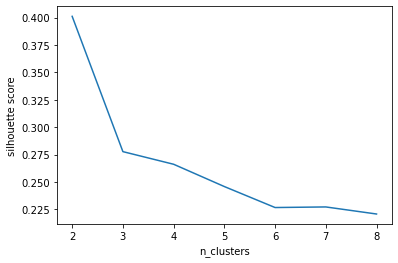

In [19]:
plt.plot(range(2, 9), scores)
plt.xlabel('n_clusters')
plt.ylabel('silhouette score')